In [1]:
import numpy as np
from numpy import genfromtxt

In [2]:
data = genfromtxt('ds1_train.csv', delimiter = ',')

In [3]:
X= data[:,[0,1]]
Y = data[:,[2]]

In [4]:
X = np.delete(X,0,0)
Y = np.delete(Y,0,0)

In [5]:
intercept = np.matrix(np.ones(len(X))).T

In [6]:
intercept.shape

(800, 1)

In [7]:
X = np.append(intercept,X,1)

In [8]:
X.shape

(800, 3)

In [9]:
g = lambda x : 1 / (1+np.exp(-x))

In [10]:
m,n = X.shape

In [11]:
theta = np.matrix(np.zeros(n)).T

In [12]:
theta

matrix([[0.],
        [0.],
        [0.]])

In [13]:
 def J(theta):
        return -(1/m)*(X.T*(Y - g(X*theta)))

In [14]:
TOL = np.power(10.,-1)
lam = 0.01
counter = 0

while np.linalg.norm(J(theta)) > TOL and counter < 100000:
  counter += 1
  theta = theta - lam*J(theta)
  
    
print('iter =',counter)
print(theta)
print('norm =',np.linalg.norm(J(theta)))

iter = 100000
[[-15.75132678]
 [  6.60161154]
 [ -0.14764632]]
norm = 11.262576754000428


In [15]:
def newton(theta):
    return (X.T*(np.diag(np.ravel(np.multiply(g(X*theta),(1-g(X*theta))))))*X)


In [16]:
TOL = np.power(10.,-5)
lam = 0.01
counter = 0

while np.linalg.norm(J(theta)) > TOL:
    counter += 1
    theta -= np.linalg.inv(newton(theta))*J(theta)
    
print('iter =',counter)
print(theta)
print('norm =',np.linalg.norm(J(theta)))
    

iter = 11140
[[-6.26018454]
 [ 2.47707243]
 [-0.02991252]]
norm = 9.990582495210431e-06


In [ ]:
newton(theta)

In [17]:
def predict(x):
    g = lambda x : 1 / (1+np.exp(-x))
    preds = g(x*theta)
    return preds>0.5

In [18]:
val_data = genfromtxt('ds1_valid.csv', delimiter = ',')

In [35]:
X_val= val_data[:,[0,1]]
Y_val = val_data[:,[2]]

In [36]:
X_val = np.delete(X_val,0,0)
Y_val = np.delete(Y_val,0,0)
intercept_val = np.matrix(np.ones(len(X_val))).T
X_val = np.append(intercept_val,X_val,1)

In [21]:
y_preds = predict(X_val)

In [22]:
y_preds = y_preds*1


In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
lm = LogisticRegression()

In [25]:
Y =np.ravel(Y)

In [26]:
lm.fit(X,Y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
hj = lm.predict(X_val)

In [28]:
lm.coef_

array([[ 1.17321014e-04,  2.40345530e+00, -2.92819547e-02]])

In [29]:
Y_val = np.ravel(Y_val)

In [30]:
y_preds = np.ravel(np.array([y_preds]))

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(Y_val,y_preds)

0.9

In [45]:
pos = X_val[Y_val[:,0]==1]
neg = X_val[Y_val[:,0]==0]


matrix([[145.22786739],
        [  5.90000946],
        [144.62026007],
        [  6.36245193],
        [ 46.06234247],
        [ 28.32804523],
        [ 39.40927091],
        [ 32.62474478],
        [ 23.77943576],
        [ 56.94344021],
        [ 31.08259887],
        [ 40.73799415],
        [  9.35476925],
        [ 28.83062783],
        [ 60.35874266],
        [ 14.79743857],
        [ 33.45128545],
        [118.53310543],
        [ 11.79889191],
        [ 53.85444414],
        [ 50.57408498],
        [ 10.92878994],
        [ 21.44129403],
        [ 11.42170765],
        [ 30.60082006],
        [ 81.44110258],
        [ 11.99180792],
        [ 10.22857542],
        [ 59.04179563],
        [  8.75526635],
        [  8.20351446],
        [127.45548967],
        [ 64.90668808],
        [ 40.51017476],
        [ 14.51402479],
        [ 36.41478534],
        [ 27.37073056],
        [ 22.30134502],
        [ 27.67969227],
        [162.45615239],
        [  7.70829009],
        [ 31.870

In [46]:
import matplotlib.pyplot as plt

In [59]:
xc = (np.ravel(pos[:,1]),np.ravel(pos[:,2]))
yc = (np.ravel(neg[:,1]),np.ravel(neg[:,2]))

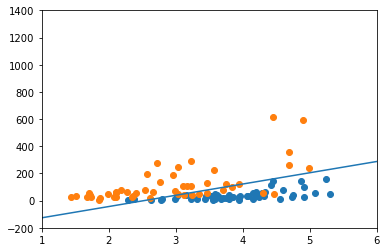

In [66]:
plt.scatter(*xc)
plt.scatter(*yc)
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlim(1,6)
plt.ylim((-200,1400))
plt.show()

In [63]:
parameters = theta.T.copy()
parameters = np.ravel(parameters)
parameters = list(parameters)
parameters

[-6.260184542082582, 2.477072431408631, -0.029912515591318675]

In [64]:
x_values = [np.min(X_val[:, 1] - 5), np.max(X_val[:, 2] + 5)]

In [65]:
y_values = - (parameters[0] + np.dot(parameters[1], x_values)) / parameters[2]